# Lesson 9 Assessment (insight.inc)

## Import all the Modules as Needed

In [264]:
import pandas as pd

In [265]:
import numpy as np

In [266]:
import matplotlib.pyplot as plt

In [267]:
import seaborn as sns

In [268]:
from scipy.stats import  chi2_contingency

In [269]:
import statsmodels.api as sm

In [270]:
from statsmodels.formula.api import ols

## Load data 

In [271]:
df_customer_satisfaction = pd.read_csv(r'C:\Users\Itumeleng.Sekoma\Desktop\Test777777\.ipynb_checkpoints\customer_satisfaction_data.csv')

# Inspect Data set 

In [272]:
df_customer_satisfaction.head()

,CustomerID,AgeGroup,Gender,ServiceRating,ProductSatisfaction,LikelihoodToRecommend
0,1,56+,Female,1,5,8
1,2,18-25,Male,2,1,3
2,3,46-55,Female,3,5,9
3,4,46-55,Male,2,1,3
4,5,46-55,Male,1,4,2


In [273]:
df_customer_satisfaction.describe()

,CustomerID,ServiceRating,ProductSatisfaction,LikelihoodToRecommend
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,3.069000,2.964000,5.522000
std,288.819436,1.384976,1.429247,2.910324
min,1.000000,1.000000,1.000000,1.000000
25%,250.750000,2.000000,2.000000,3.000000
50%,500.500000,3.000000,3.000000,6.000000
75%,750.250000,4.000000,4.000000,8.000000
max,1000.000000,5.000000,5.000000,10.000000


In [274]:
df_customer_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             1000 non-null   int64 
 1   AgeGroup               1000 non-null   object
 2   Gender                 1000 non-null   object
 3   ServiceRating          1000 non-null   int64 
 4   ProductSatisfaction    1000 non-null   int64 
 5   LikelihoodToRecommend  1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


In [275]:
num_of_records=df_customer_satisfaction.shape[0]
num_of_attributes = df_customer_satisfaction.shape[1]
print("This DataFrame contains ",num_of_records," Observations","\nThere are ", num_of_attributes, " Fields")


This DataFrame contains  1000  Observations 
There are  6  Fields


In [276]:
null_values = df_customer_satisfaction.isnull().sum()
null_values

CustomerID               0
AgeGroup                 0
Gender                   0
ServiceRating            0
ProductSatisfaction      0
LikelihoodToRecommend    0
dtype: int64

## 1. Analyze the distribution of service ratings and product satisfaction levels.

c:\Users\Itumeleng.Sekoma\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Itumeleng.Sekoma\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


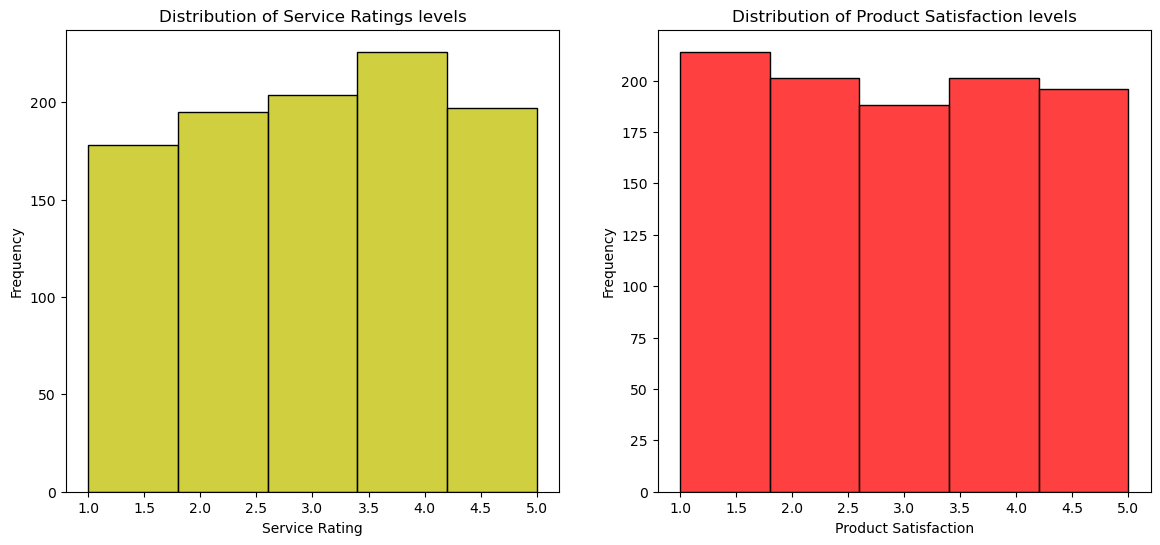

In [277]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(df_customer_satisfaction['ServiceRating'], bins=5, color='y',kde=False)
plt.title('Distribution of Service Ratings levels')
plt.xlabel('Service Rating')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.histplot(df_customer_satisfaction['ProductSatisfaction'],bins=5, color='r',kde=False)
plt.title('Distribution of Product Satisfaction levels')
plt.xlabel('Product Satisfaction')
plt.ylabel('Frequency')

plt.show()

## 2. Calculate the average likelihood to recommend score. Is there a significant difference between age groups?

In [278]:
average_likeTORec = df_customer_satisfaction['LikelihoodToRecommend'].mean()

In [279]:
likeToRec_by_age_group = df_customer_satisfaction.groupby('AgeGroup')['LikelihoodToRecommend'].mean()

In [280]:
model = ols('LikelihoodToRecommend ~ AgeGroup',data=df_customer_satisfaction).fit()

In [281]:
anova_table = sm.stats.anova_lm(model,typ=2)

In [282]:
print('This is the Average Likelihood To Recommend: ',average_likeTORec.round(2))

This is the Average Likelihood To Recommend:  5.52


In [283]:
print('This is the Average Likelihood To Recommend by Age Group')
likeToRec_by_age_group.sort_values(ascending=False).round(2)

This is the Average Likelihood To Recommend by Age Group


AgeGroup
46-55    5.70
56+      5.69
18-25    5.51
36-45    5.37
26-35    5.32
Name: LikelihoodToRecommend, dtype: float64

### There is not much significance in terms of the avereage likelihood to recommend between different age groups. Not only that the average likelihood to recommend for all customers is 5.52, while the average of the age group that is most likely to recommend is 5.70 only 0.18 points more (+0.18) and the average of the age group that is least likely to recommend is 5.32 only  0.20 points less (-0.20). The table below shows the complete ANalysis Of Variance

In [284]:
anova_table

,sum_sq,df,F,PR(>F)
AgeGroup,24.737172,4.0,0.729351,0.571969
Residual,8436.778828,995.0,NaN,NaN


## 3. Determine if there is any association between service rating and product satisfaction using a contingency table and appropriate statistical test.

In [285]:
df_customer_satisfaction.head()

,CustomerID,AgeGroup,Gender,ServiceRating,ProductSatisfaction,LikelihoodToRecommend
0,1,56+,Female,1,5,8
1,2,18-25,Male,2,1,3
2,3,46-55,Female,3,5,9
3,4,46-55,Male,2,1,3
4,5,46-55,Male,1,4,2


In [286]:
contingency_table = pd.crosstab(df_customer_satisfaction['ServiceRating'],df_customer_satisfaction['ProductSatisfaction'])
contingency_table

ProductSatisfaction,1,2,3,4,5
ServiceRating,,,,,
1,34,38,39,32,35
2,58,31,32,41,33
3,40,41,36,47,40
4,42,54,41,42,47
5,40,37,40,39,41


In [287]:
chi2,p,dof,expected = chi2_contingency(contingency_table)
print("Chi-squared: ",chi2,"\nP-valve: ",p)

Chi-squared:  16.2712055778821 
P-valve:  0.43419821501618044


## 4. Explore the relationship between gender and likelihood to recommend using descriptive statistics.

In [288]:
likeToRec_by_gender = df_customer_satisfaction.groupby('Gender')['LikelihoodToRecommend'].describe()
likeToRec_by_gender

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,510.0,5.619608,2.897124,1.0,3.0,6.0,8.0,10.0
Male,490.0,5.420408,2.923495,1.0,3.0,5.0,8.0,10.0


## 5. Identify the most common age group among satisfied customers (service rating >= 4 and product satisfaction >=

In [289]:
satisfied_customers = df_customer_satisfaction[(df_customer_satisfaction['ServiceRating'] >= 4)&(df_customer_satisfaction['ProductSatisfaction'] >= 4)]
satisfied_customers.reset_index(drop=True,inplace=True)
satisfied_customers.tail()

,CustomerID,AgeGroup,Gender,ServiceRating,ProductSatisfaction,LikelihoodToRecommend
164,960,56+,Male,4,5,1
165,968,56+,Male,4,5,7
166,985,36-45,Male,4,5,5
167,992,18-25,Male,4,4,9
168,994,18-25,Male,4,5,6


In [290]:
most_satisfied_age_group_of_customers = satisfied_customers['AgeGroup'].mode()[0]
most_satisfied_age_group_of_customers

'46-55'

## 6. Analyze the variability in likelihood to recommend scores across different service rating levels.

In [291]:
likeToRec_variability_by_serviceRating = df_customer_satisfaction.groupby('ServiceRating')['LikelihoodToRecommend'].var()
likeToRec_variability_by_serviceRating.sort_values(ascending=False).round(2)

ServiceRating
2    9.05
4    8.50
1    8.39
5    8.32
3    8.16
Name: LikelihoodToRecommend, dtype: float64